In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
import tensorflow as tf
from numpy import array
from google.colab import drive
import seaborn as sns
import numpy
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/Project TA

/content/drive/My Drive/Project TA


In [ ]:
ls

 30daypredict.png                         JKII_5years.csv
 ACES.JK.csv                              JKII_5years_normalized.csv
 AHAP.JK.csv                              JKII_Covid.csv
 ALKA.JK.csv                             '^JKII.csv'
 ALMI.JK.csv                              JKII.csv
'BBRI.JK (3).csv'                        'KAYU.JK (1).csv'
 dataprediksisaham30harikedepanasli.csv   KAYU.JK.csv
 dataprediksisaham30harikedepan.csv       PFE.csv
 dataprediksisaham.csv                    TLKM.JK.csv
'GDST.JK (1).csv'                        'Video Presentasi Laporan TA.mp4'
 GDST.JK.csv


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Preprosessing Data

In [61]:
df = pd.read_csv('JKII_Covid.csv')
df.head()
df = df.dropna()
data = df


In [62]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df
#data['Date'] = pd.to_numeric(data['Date'])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,685.409973,687.739990,682.400024,684.919983,684.919983,4.494000e+08
2019-01-03,685.210022,695.299988,685.210022,695.299988,695.299988,7.735000e+08
2019-01-04,692.369995,701.739990,691.479980,701.739990,701.739990,9.954000e+08
2019-01-07,708.109985,713.150024,704.109985,704.109985,704.109985,1.043000e+09
2019-01-08,704.520020,707.460022,694.359985,698.650024,698.650024,9.771000e+08
...,...,...,...,...,...,...
2022-03-25,590.190002,590.239990,581.080017,584.150024,584.150024,1.591400e+09
2022-03-28,584.289978,590.909973,583.469971,589.789978,589.789978,1.927200e+09
2022-03-29,590.650024,592.440002,586.500000,586.609985,586.609985,1.753500e+09


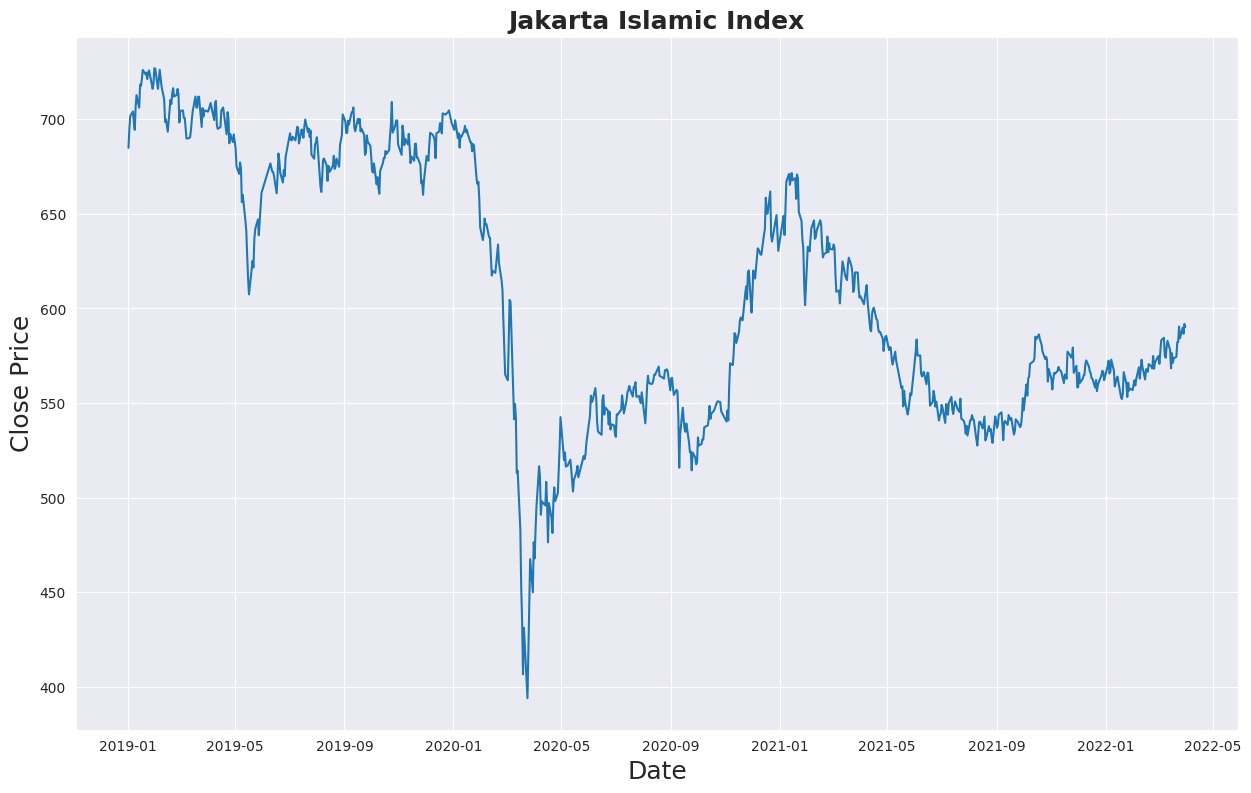

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(df[['Close']])
#plt.xticks(range(0,data.shape[0],100),data['Date'].loc[::100],rotation=45)
plt.title("Jakarta Islamic Index",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

#LSTM

In [63]:
data=data.reset_index()['Close']
data

0      684.919983
1      695.299988
2      701.739990
3      704.109985
4      698.650024
          ...    
790    584.150024
791    589.789978
792    586.609985
793    591.760010
794    590.169983
Name: Close, Length: 795, dtype: float64

Normalisasi Data


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

Splitting Data 70% Data training dan 30% Data Testing

In [65]:
##splitting dataset into train and test split
training_size=int(len(data)*0.7)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [66]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

Konversi Data ke dalam bentuk Matriks

In [93]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 39
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [94]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

## Modelling

In [95]:
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(39,1)))
model.add(Dense(1))
model.compile (loss = 'mean_squared_error', optimizer = 'adam')

Proseng tuning Model

In [96]:
h= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100, batch_size=32,verbose=1)

Epoch 1/100
17/17 [==============================] - 8s 47ms/step - loss: 0.2006 - val_loss: 0.0212
Epoch 2/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0930 - val_loss: 0.0119
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0797 - val_loss: 0.0127
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0739 - val_loss: 0.0124
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0695 - val_loss: 0.0113
Epoch 6/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0657 - val_loss: 0.0181
Epoch 7/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0623 - val_loss: 0.0206
Epoch 8/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0599 - val_loss: 0.0327
Epoch 9/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0572 - val_loss: 0.0275
Epoch 10/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0556 - val_loss: 0.0194

In [ ]:
model.save('model_LSTM.h5')

## Prediksi Dan Visualisasi

In [ ]:
import tensorflow as tf

Membuat variabel prediksi train dan test

In [ ]:
### Lets Do the prediction and check performance metrics
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


Mengembalikan data kedalam bentuk sebelum dilakukan Normalisasi

In [ ]:
train_predict=scaler.inverse_transform(y_pred_train)
test_predict=scaler.inverse_transform(y_pred_test)
Ytest = scaler.inverse_transform(y_test.reshape(y_test.shape[0], 1))
Ytrain = scaler.inverse_transform(y_train.reshape(y_train.shape[0],1))


Melakukukan pengecekan Loss dengan RMSE dan MAPE

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Hitung MSE
mse_loss = tf.keras.losses.MeanSquaredError()(Ytest, test_predict)
bce_loss = tf.keras.losses.BinaryCrossentropy()(Ytest, test_predict)
cce_loss = tf.keras.losses.CategoricalCrossentropy()(Ytest, test_predict)
mae_loss = tf.keras.losses.MeanAbsoluteError()(Ytest, test_predict)
huber_loss = tf.keras.losses.Huber()(Ytest, test_predict)
hinge_loss = tf.keras.losses.Hinge()(Ytest, test_predict)
mape = mean_absolute_percentage_error(Ytest, test_predict)
rmse = mean_squared_error(y_true, y_pred, squared=False)


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(199, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



In [ ]:
print(mse_loss)
print(bce_loss)
print(cce_loss)
print(mae_loss)
print(huber_loss)
print(hinge_loss)
print(mape)
print(rmse)

tf.Tensor(60.08412, shape=(), dtype=float32)
tf.Tensor(-8550.18, shape=(), dtype=float32)
tf.Tensor(6.6593166e-05, shape=(), dtype=float32)
tf.Tensor(6.556407, shape=(), dtype=float32)
tf.Tensor(6.0692544, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
0.011673435344018771
7.751394962208208


Visualisasi Loss 

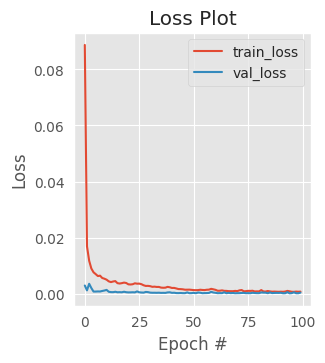

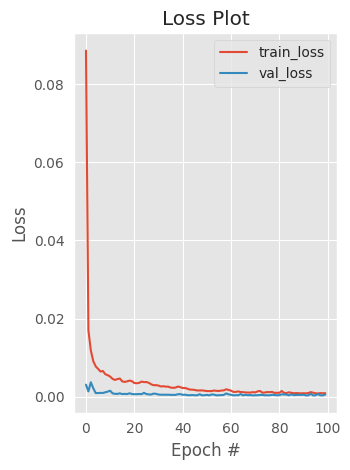

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

plt.subplot2grid((4, 4), (1, 0), rowspan=4, colspan=2)
plt.plot(np.arange(0, 100), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), h.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.subplot2grid((4, 4), (0, 2), rowspan=4, colspan=2)
plt.plot(np.arange(0, 100), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), h.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'Los.svg'

Pembuatan variabel untuk visualisasi data for prediksi

In [ ]:
original= scaler.inverse_transform(data)

In [ ]:
look_back=39
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

In [ ]:
df['predict_train'] = trainPredictPlot
df['predict_test'] = testPredictPlot
df

Visualisasi data training dan test untuk prediksi

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=df.index, y=df['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


Pembuatan variabel untuk memprediksi di kemudian hari

In [ ]:
len(test_data)

239

In [ ]:
x_input=test_data[200:].reshape(1,-1)
x_input.shape

(1, 39)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=39
i=0
while(i<30):
    
    if(len(temp_input)>39):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
lst_output = scaler.inverse_transform(lst_output)
lst_output

In [ ]:
predict30day = np.empty_like(data)
predict30day[:,:] = np.nan
predict30day = np.concatenate((predict30day, lst_output))


In [ ]:


# membuat tanggal-tanggal baru dengan jeda 1 hari selama 30 hari
new_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# membuat DataFrame yang terdiri dari 30 baris berisi NaN dengan index tanggal yang baru
new_data = pd.DataFrame(np.nan, columns=df.columns, index=new_dates)

# menggabungkan DataFrame lama dengan DataFrame yang baru
#data_predict_lstm = pd.concat([df, new_data])
data_predict_lstm['predic_30days'] = predict30day


In [ ]:
result = result.replace({0 : 'Train prediction', 1 : 'Test Prediction', 2 : 'Actual Data', '3' : 'Prediction 30 days'})
result

,0,1,2,3
0,NaN,NaN,684.919983,NaN
1,NaN,NaN,695.299988,NaN
2,NaN,NaN,701.739990,NaN
3,NaN,NaN,704.109985,NaN
4,NaN,NaN,698.650024,NaN
...,...,...,...,...
25,NaN,NaN,NaN,537.962494
26,NaN,NaN,NaN,538.322963
27,NaN,NaN,NaN,538.653428
28,NaN,NaN,NaN,538.945986


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=coba.index, y=coba['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=coba.index, y=coba['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=coba.index, y=coba['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.add_trace(go.Scatter(go.Scatter(x=coba.index, y=coba['predic_30days'],
                    mode='lines',
                    name='Predict 30 Days')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


# Linear Regression

In [44]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [45]:
from sklearn.linear_model import LinearRegression

# Define model architecture
model_lr = LinearRegression()

# Fit model to training data
model_lr.fit(X_train, y_train)
dump(model_lr, 'Xgboost_model.joblib')


LinearRegression()

## Prediksi Dan Visualisasi

In [23]:
import tensorflow as tf
y_pred_train=model_lr.predict(X_train)
y_pred_test=model_lr.predict(X_test)
train_predict = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
Ytest = scaler.inverse_transform(y_test.reshape(-1, 1))
Ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))


import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Hitung MSE
mse_loss = tf.keras.losses.MeanSquaredError()(Ytest, test_predict)
bce_loss = tf.keras.losses.BinaryCrossentropy()(Ytest, test_predict)
cce_loss = tf.keras.losses.CategoricalCrossentropy()(Ytest, test_predict)
mae_loss = tf.keras.losses.MeanAbsoluteError()(Ytest, test_predict)
huber_loss = tf.keras.losses.Huber()(Ytest, test_predict)
hinge_loss = tf.keras.losses.Hinge()(Ytest, test_predict)
mape = mean_absolute_percentage_error(Ytest, test_predict)
rmse = mean_squared_error(Ytest, test_predict, squared=False)



print(mse_loss)
print(bce_loss)
print(cce_loss)
print(mae_loss)
print(huber_loss)
print(hinge_loss)
print(mape)
print(rmse)


Membuat variabel prediksi train dan test

In [51]:
original= scaler.inverse_transform(data)

look_back=1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

df['predict_train'] = trainPredictPlot
df['predict_test'] = testPredictPlot
df

Visualisasi data training dan test untuk prediksi

In [54]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=df.index, y=df['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


# XGboost Regression

In [68]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [73]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

# Set hyperparameter yang akan di-tune
param_grid = {
    'max_depth': [7,8,9],
    'learning_rate': [0.1],
    'n_estimators': [200,300,400],
    'gamma': [0.1, 0.2],
    'subsample': [0.5],
    'colsample_bytree': [0.5],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [1, 2]
}

# Tuning hyperparameter menggunakan GridSearchCV
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

accuracy = grid_search.score(X_test, y_test)
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

dump(grid_search, 'Xgboost_model.joblib')


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [74]:
import tensorflow as tf
y_pred_train=grid_search.predict(X_train)
y_pred_test=grid_search.predict(X_test)
train_predict = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
Ytest = scaler.inverse_transform(y_test.reshape(-1, 1))
Ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))


import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Hitung MSE
mse_loss = tf.keras.losses.MeanSquaredError()(Ytest, test_predict)
bce_loss = tf.keras.losses.BinaryCrossentropy()(Ytest, test_predict)
cce_loss = tf.keras.losses.CategoricalCrossentropy()(Ytest, test_predict)
mae_loss = tf.keras.losses.MeanAbsoluteError()(Ytest, test_predict)
huber_loss = tf.keras.losses.Huber()(Ytest, test_predict)
hinge_loss = tf.keras.losses.Hinge()(Ytest, test_predict)
mape = mean_absolute_percentage_error(Ytest, test_predict)
rmse = mean_squared_error(Ytest, test_predict, squared=False)



print(mse_loss)
print(bce_loss)
print(cce_loss)
print(mae_loss)
print(huber_loss)
print(hinge_loss)
print(mape)
print(rmse)


tf.Tensor(38.95328, shape=(), dtype=float32)
tf.Tensor(-8585.128, shape=(), dtype=float32)
tf.Tensor(6.6864864e-05, shape=(), dtype=float32)
tf.Tensor(4.844662, shape=(), dtype=float32)
tf.Tensor(4.3758736, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
0.008673180188323115
6.241256288648999


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(237, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



In [77]:
original= scaler.inverse_transform(data)

look_back=1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

df['predict_train'] = trainPredictPlot
df['predict_test'] = testPredictPlot
df

,Open,High,Low,Close,Adj Close,Volume,predict_train,predict_test
Date,,,,,,,,
2019-01-02,685.409973,687.739990,682.400024,684.919983,684.919983,4.494000e+08,NaN,NaN
2019-01-03,685.210022,695.299988,685.210022,695.299988,695.299988,7.735000e+08,683.051636,NaN
2019-01-04,692.369995,701.739990,691.479980,701.739990,701.739990,9.954000e+08,692.197937,NaN
2019-01-07,708.109985,713.150024,704.109985,704.109985,704.109985,1.043000e+09,695.760742,NaN
2019-01-08,704.520020,707.460022,694.359985,698.650024,698.650024,9.771000e+08,695.760742,NaN
...,...,...,...,...,...,...,...,...
2022-03-25,590.190002,590.239990,581.080017,584.150024,584.150024,1.591400e+09,NaN,584.505432
2022-03-28,584.289978,590.909973,583.469971,589.789978,589.789978,1.927200e+09,NaN,576.776367
2022-03-29,590.650024,592.440002,586.500000,586.609985,586.609985,1.753500e+09,NaN,584.505432


Visualisasi data training dan test untuk prediksi

In [78]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=df.index, y=df['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


# Support Vector Regression

In [79]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [83]:
from sklearn.svm import SVR
svm = SVR(kernel = 'linear')

svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

dump(svm, 'SVR_model.joblib')


Akurasi model KNN: 75.89%


['SVR_model.joblib']

In [84]:
import tensorflow as tf
y_pred_train=grid_search.predict(X_train)
y_pred_test=grid_search.predict(X_test)
train_predict = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
Ytest = scaler.inverse_transform(y_test.reshape(-1, 1))
Ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))


import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Hitung MSE
mse_loss = tf.keras.losses.MeanSquaredError()(Ytest, test_predict)
bce_loss = tf.keras.losses.BinaryCrossentropy()(Ytest, test_predict)
cce_loss = tf.keras.losses.CategoricalCrossentropy()(Ytest, test_predict)
mae_loss = tf.keras.losses.MeanAbsoluteError()(Ytest, test_predict)
huber_loss = tf.keras.losses.Huber()(Ytest, test_predict)
hinge_loss = tf.keras.losses.Hinge()(Ytest, test_predict)
mape = mean_absolute_percentage_error(Ytest, test_predict)
rmse = mean_squared_error(Ytest, test_predict, squared=False)



print(mse_loss)
print(bce_loss)
print(cce_loss)
print(mae_loss)
print(huber_loss)
print(hinge_loss)
print(mape)
print(rmse)


tf.Tensor(117.6447621975743, shape=(), dtype=float64)
tf.Tensor(-8636.47678185206, shape=(), dtype=float64)
tf.Tensor(5.609031482224971e-05, shape=(), dtype=float64)
tf.Tensor(9.13062814934545, shape=(), dtype=float64)
tf.Tensor(8.635279, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float64)
0.016525388344647795
10.846417021190652


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(237, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



In [85]:
original= scaler.inverse_transform(data)

look_back=1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

df['predict_train'] = trainPredictPlot
df['predict_test'] = testPredictPlot
df

,Open,High,Low,Close,Adj Close,Volume,predict_train,predict_test
Date,,,,,,,,
2019-01-02,685.409973,687.739990,682.400024,684.919983,684.919983,4.494000e+08,NaN,NaN
2019-01-03,685.210022,695.299988,685.210022,695.299988,695.299988,7.735000e+08,656.297400,NaN
2019-01-04,692.369995,701.739990,691.479980,701.739990,701.739990,9.954000e+08,663.564212,NaN
2019-01-07,708.109985,713.150024,704.109985,704.109985,704.109985,1.043000e+09,668.072716,NaN
2019-01-08,704.520020,707.460022,694.359985,698.650024,698.650024,9.771000e+08,669.731897,NaN
...,...,...,...,...,...,...,...,...
2022-03-25,590.190002,590.239990,581.080017,584.150024,584.150024,1.591400e+09,NaN,590.105035
2022-03-28,584.289978,590.909973,583.469971,589.789978,589.789978,1.927200e+09,NaN,585.750570
2022-03-29,590.650024,592.440002,586.500000,586.609985,586.609985,1.753500e+09,NaN,589.698978


Visualisasi data training dan test untuk prediksi

In [86]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=df.index, y=df['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


# Gradient Boost Regression

In [87]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

Reshape data sesuai input yang dibutuhkan di dalam LSTM 

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor( random_state = 42)

# Define parameter grid for grid search
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.2],
    "max_depth": [3, 5, 7],
    'min_samples_split' : [2,5],
    'min_samples_leaf'  : [1,2]
}


# Train the model using grid search and cross-validation


# Tuning hyperparameter menggunakan GridSearchCV
model = GridSearchCV(gb_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Hyperparameter terbaik:", model.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

dump(grid_search, 'Gradient_boost_model.joblib')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Hyperparameter terbaik: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Akurasi model KNN: 87.05%


['Gradient_boost_model.joblib']

In [90]:
import tensorflow as tf
y_pred_train=grid_search.predict(X_train)
y_pred_test=grid_search.predict(X_test)
train_predict = scaler.inverse_transform(y_pred_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(y_pred_test.reshape(-1, 1))
Ytest = scaler.inverse_transform(y_test.reshape(-1, 1))
Ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))


import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Hitung MSE
mse_loss = tf.keras.losses.MeanSquaredError()(Ytest, test_predict)
bce_loss = tf.keras.losses.BinaryCrossentropy()(Ytest, test_predict)
cce_loss = tf.keras.losses.CategoricalCrossentropy()(Ytest, test_predict)
mae_loss = tf.keras.losses.MeanAbsoluteError()(Ytest, test_predict)
huber_loss = tf.keras.losses.Huber()(Ytest, test_predict)
hinge_loss = tf.keras.losses.Hinge()(Ytest, test_predict)
mape = mean_absolute_percentage_error(Ytest, test_predict)
rmse = mean_squared_error(Ytest, test_predict, squared=False)



print(mse_loss)
print(bce_loss)
print(cce_loss)
print(mae_loss)
print(huber_loss)
print(hinge_loss)
print(mape)
print(rmse)


tf.Tensor(117.6447621975743, shape=(), dtype=float64)
tf.Tensor(-8636.47678185206, shape=(), dtype=float64)
tf.Tensor(5.609031482224971e-05, shape=(), dtype=float64)
tf.Tensor(9.13062814934545, shape=(), dtype=float64)
tf.Tensor(8.635279, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float64)
0.016525388344647795
10.846417021190652


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(237, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



In [91]:
original= scaler.inverse_transform(data)

look_back=1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

df['predict_train'] = trainPredictPlot
df['predict_test'] = testPredictPlot
df

,Open,High,Low,Close,Adj Close,Volume,predict_train,predict_test
Date,,,,,,,,
2019-01-02,685.409973,687.739990,682.400024,684.919983,684.919983,4.494000e+08,NaN,NaN
2019-01-03,685.210022,695.299988,685.210022,695.299988,695.299988,7.735000e+08,656.297400,NaN
2019-01-04,692.369995,701.739990,691.479980,701.739990,701.739990,9.954000e+08,663.564212,NaN
2019-01-07,708.109985,713.150024,704.109985,704.109985,704.109985,1.043000e+09,668.072716,NaN
2019-01-08,704.520020,707.460022,694.359985,698.650024,698.650024,9.771000e+08,669.731897,NaN
...,...,...,...,...,...,...,...,...
2022-03-25,590.190002,590.239990,581.080017,584.150024,584.150024,1.591400e+09,NaN,590.105035
2022-03-28,584.289978,590.909973,583.469971,589.789978,589.789978,1.927200e+09,NaN,585.750570
2022-03-29,590.650024,592.440002,586.500000,586.609985,586.609985,1.753500e+09,NaN,589.698978


Visualisasi data training dan test untuk prediksi

In [92]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['predict_train'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=df.index, y=df['predict_test'],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=df.index, y=df['Close'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='black',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=26,
            color='black',
        ),
    ),
    showlegend=True,
    template = 'plotly_white'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='black'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()
